https://habrahabr.ru/company/ods/blog/323210/

In [15]:
# Python 2 and 3 compatibility
# pip install future
from __future__ import (absolute_import, division,
                        print_function, unicode_literals)
# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

# будем отображать графики прямо в jupyter'e
%pylab inline

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5
import pandas as pd
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


После этого загрузим в DataFrame данные, с которыми будем работать. Для примеров я выбрала данные о продажах и оценках видео-игр из Kaggle Datasets.

In [16]:
df = pd.read_csv('../data/video_games_sales.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
Name               16717 non-null object
Platform           16719 non-null object
Year_of_Release    16450 non-null float64
Genre              16717 non-null object
Publisher          16665 non-null object
NA_Sales           16719 non-null float64
EU_Sales           16719 non-null float64
JP_Sales           16719 non-null float64
Other_Sales        16719 non-null float64
Global_Sales       16719 non-null float64
Critic_Score       8137 non-null float64
Critic_Count       8137 non-null float64
User_Score         10015 non-null object
User_Count         7590 non-null float64
Developer          10096 non-null object
Rating             9950 non-null object
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [17]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


Некоторые признаки, которые pandas считал как object, явно приведем к типам float или int.

Данные есть не для всех игр, поэтому давайте оставим только те записи, в которых нет пропусков, с помощью метода dropna.

In [19]:
df = df.dropna()
print(df.shape)

(6825, 16)


In [20]:
df['User_Score'] = df.User_Score.astype('float64')
df['Year_of_Release'] = df.Year_of_Release.astype('int64')
df['User_Count'] = df.User_Count.astype('int64')
df['Critic_Count'] = df.Critic_Count.astype('int64')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6825 entries, 0 to 16706
Data columns (total 16 columns):
Name               6825 non-null object
Platform           6825 non-null object
Year_of_Release    6825 non-null int64
Genre              6825 non-null object
Publisher          6825 non-null object
NA_Sales           6825 non-null float64
EU_Sales           6825 non-null float64
JP_Sales           6825 non-null float64
Other_Sales        6825 non-null float64
Global_Sales       6825 non-null float64
Critic_Score       6825 non-null float64
Critic_Count       6825 non-null int64
User_Score         6825 non-null float64
User_Count         6825 non-null int64
Developer          6825 non-null object
Rating             6825 non-null object
dtypes: float64(7), int64(3), object(6)
memory usage: 906.4+ KB


Всего в таблице 6825 объектов и 16 признаков для них. Посмотрим на несколько первых записей c помощью метода head, чтобы убедиться, что все распарсилось правильно. Для удобства я оставила только те признаки, которые мы будем в дальнейшем использовать.

In [22]:
useful_cols = ['Name', 'Platform', 'Year_of_Release', 'Genre', 
               'Global_Sales', 'Critic_Score', 'Critic_Count',
               'User_Score', 'User_Count', 'Rating'
              ]
df[useful_cols].head()

,Name,Platform,Year_of_Release,Genre,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006,Sports,82.53,76.0,51,8.0,322,E
2,Mario Kart Wii,Wii,2008,Racing,35.52,82.0,73,8.3,709,E
3,Wii Sports Resort,Wii,2009,Sports,32.77,80.0,73,8.0,192,E
6,New Super Mario Bros.,DS,2006,Platform,29.80,89.0,65,8.5,431,E
7,Wii Play,Wii,2006,Misc,28.92,58.0,41,6.6,129,E


Прежде чем мы перейдем к рассмотрению методов библиотек seaborn и plotly, обсудим самый простой и зачастую удобный способ визуализировать данные из pandas DataFrame — это воспользоваться функцией plot.
Для примера построим график продаж видео игр в различных странах в зависимости от года. Для начала отфильтруем только нужные нам столбцы, затем посчитаем суммарные продажи по годам и у получившегося DataFrame вызовем функцию plot без параметров.

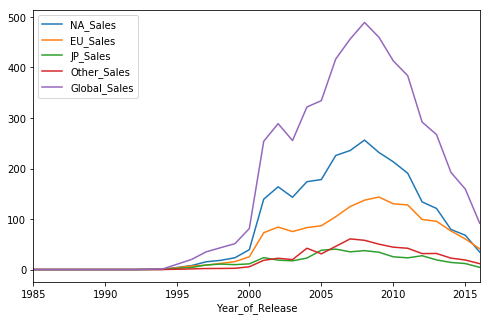

In [23]:
sales_df = df[[x for x in df.columns if 'Sales' in x] + ['Year_of_Release']]
sales_df.groupby('Year_of_Release').sum().plot()

Реализация функции plot в pandas основана на библиотеке matplotlib.

C помощью параметра kind можно изменить тип графика, например, на bar chart. Matplotlib позволяет очень гибко настраивать графики. На графике можно изменить почти все, что угодно, но потребуется порыться в документации и найти нужные параметры. Например, параметр rot отвечает за угол наклона подписей к оси x.

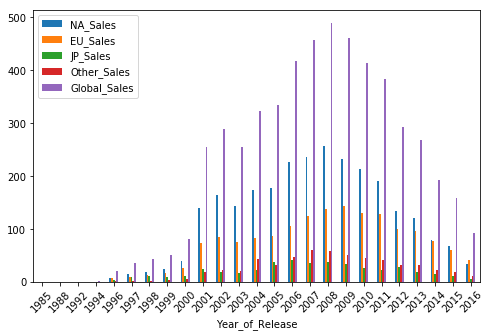

In [27]:
sales_df.groupby('Year_of_Release').sum().plot(kind='bar', rot=45)

# Seaborn

Теперь давайте перейдем к библиотеке seaborn. Seaborn — это по сути более высокоуровневое API на базе библиотеки matplotlib. Seaborn содержит более адекватные дефолтные настройки оформления графиков. Если просто добавить в код import seaborn, то картинки станут гораздо симпатичнее. Также в библиотеке есть достаточно сложные типы визуализации, которые в matplotlib потребовали бы большого количество кода.

Познакомимся с первым таким "сложным" типом графиков pair plot (scatter plot matrix). Эта визуализация поможет нам посмотреть на одной картинке, как связаны между собой различные признаки.

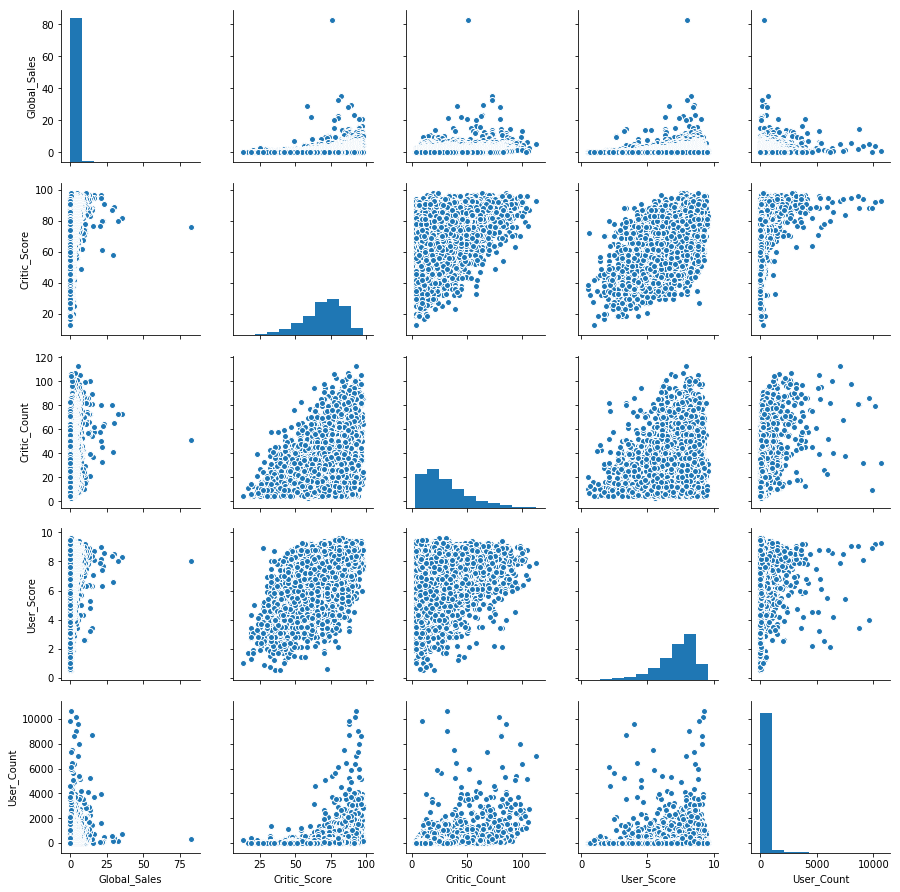

In [28]:
cols = ['Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count']
sns_plot = sns.pairplot(df[cols])
sns_plot.savefig('pairplot.png')

Как можно видеть, на диагонали матрицы графиков расположены гистограммы распределений признака. Остальные же графики — это обычные scatter plots для соответствующих пар признаков.

Для сохранения графиков в файлы стоит использовать метод savefig.

С помощью seaborn можно построить и распределение dist plot. Для примера посмотрим на распределение оценок критиков Critic_Score. По умолчанию на графике отображается гистограмма и kernel density estimation.

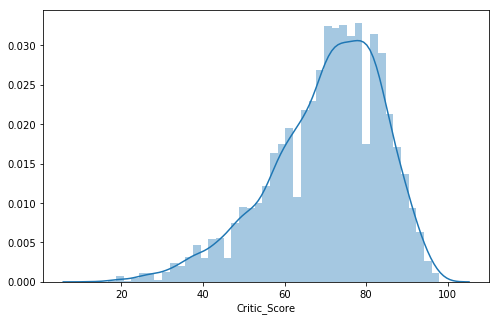

In [29]:
sns.distplot(df.Critic_Score)

Для того, чтобы подробнее посмотреть на взаимосвязь двух численных признаков, есть еще и joint plot — это гибрид scatter plot и histogram. Посмотрим на то, как связаны между собой оценка критиков Critic_Score и оценка пользователя User_Score.

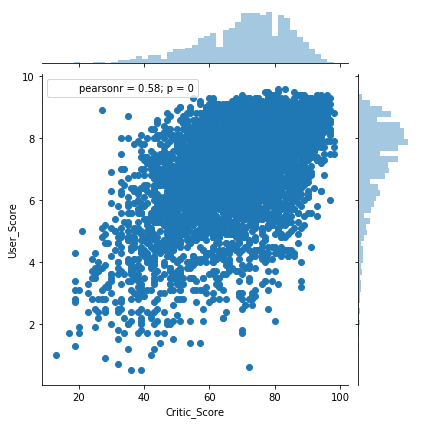

In [37]:
sns.jointplot(x='Critic_Score', y='User_Score', 
              data=df, kind='scatter');

Еще один полезный тип графиков — это box plot. Давайте сравним оценки игр от критиков для топ-5 крупнейших игровых платформ.

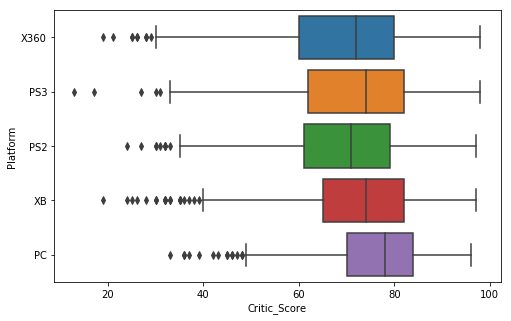

In [38]:
top_platforms = df.Platform.value_counts().sort_values(ascending = False).head(5).index.values
sns.boxplot(y="Platform", x="Critic_Score", data=df[df.Platform.isin(top_platforms)], orient="h")

Думаю, стоит обсудить немного подробнее, как же понимать box plot. Box plot состоит из коробки (поэтому он и называется box plot), усиков и точек. Коробка показывает интерквартильный размах распределения, то есть соответственно 25% (Q1) и 75% (Q3) перцентили. Черта внутри коробки обозначает медиану распределения.
С коробкой разобрались, перейдем к усам. Усы отображают весь разброс точек кроме выбросов, то есть минимальные и максимальные значения, которые попадают в промежуток (Q1 - 1.5*IQR, Q3 + 1.5*IQR), где IQR = Q3 - Q1 — интерквартильный размах. Точками на графике обозначаются выбросы (outliers) — те значения, которые не вписываются в промежуток значений, заданный усами графика.

Для понимания лучше один раз увидеть, поэтому вот еще и картинка с Wikipedia: https://en.wikipedia.org/wiki/Box_plot

И еще один тип графиков (последний из тех, которые мы рассмотрим в этой статье) — это heat map. Heat map позволяет посмотреть на распределение какого-то численного признака по двум категориальным. Визуализируем суммарные продажи игр по жанрам и игровым платформам.

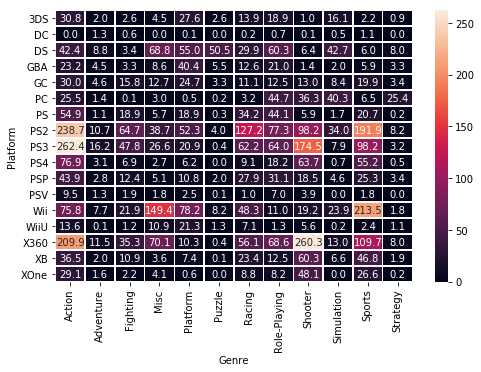

In [39]:
platform_genre_sales = df.pivot_table(
                        index='Platform', 
                        columns='Genre', 
                        values='Global_Sales', 
                        aggfunc=sum).fillna(0).applymap(float)
sns.heatmap(platform_genre_sales, annot=True, fmt=".1f", linewidths=.5)

# Plotly

Мы рассмотрели визуализации на базе библиотеки matplotlib. Однако это не единственная опция для построения графиков на языке python. Познакомимся также с библиотекой plotly. Plotly — это open-source библиотека, которая позволяет строить интерактивные графики в jupyter.notebook'e без необходимости зарываться в javascript код.

Прелесть интерактивных графиков заключается в том, что можно посмотреть точное численное значение при наведении мыши, скрыть неинтересные ряды в визуализации, приблизить определенный участок графика и т.д.

Перед началом работы импортируем все необходимые модули и инициализируем plotly с помощью команды init_notebook_mode.

In [41]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

Для начала построим line plot с динамикой числа вышедших игр и их продаж по годам.

In [43]:
# посчитаем число вышедших игр и проданных копий по годам
years_df = df.groupby('Year_of_Release')[['Global_Sales']].sum().join(
    df.groupby('Year_of_Release')[['Name']].count()
)
years_df.columns = ['Global_Sales', 'Number_of_Games']

# создаем линию для числа проданных копий
trace0 = go.Scatter(
    x=years_df.index,
    y=years_df.Global_Sales,
    name='Global Sales'
)

# создаем линию для числа вышедших игр 
trace1 = go.Scatter(
    x=years_df.index,
    y=years_df.Number_of_Games,
    name='Number of games released'
)

# определяем массив данных и задаем title графика в layout
data = [trace0, trace1]
layout = {'title': 'Statistics of video games'}

# cоздаем объект Figure и визуализируем его
fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

В plotly строится визуализация объекта Figure, который состоит из данных (массив линий, которые в библиотеке называются traces) и оформления/стиля, за который отвечает объект layout. В простых случаях можно вызывать функцию iplot и просто от массива traces.

Параметр show_link отвечает за ссылки на online-платформу plot.ly на графиках. Поскольку обычно это функциональность не нужна, то я предпочитаю скрывать ее для предотвращения случайных нажатий.

Можно сразу сохранить график в виде html-файла.

In [44]:
plotly.offline.plot(fig, filename='years_stats.html', show_link=False)

'file://C:\\Users\\Людмила\\DataScienceLiuda\\my-data-science-study-jam\\Mlcourse_open\\Week2__visual_analysis\\years_stats.html'